In [94]:
import os 
import cv2 
import matplotlib.pyplot as plt 
import numpy as np 
import dlib 

In [95]:
my_image_path = 'images/selfie.jpg' 
img_bgr = cv2.imread(my_image_path)    
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_show = img_bgr.copy()

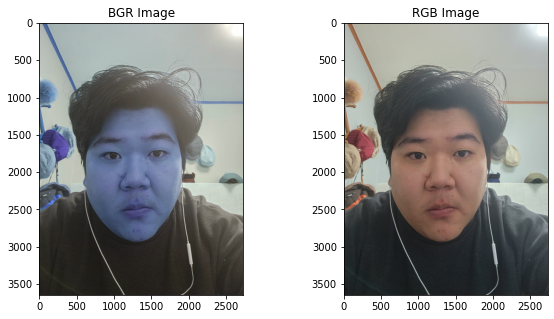

In [96]:
plt.figure(figsize=(10, 5))  

# 첫 번째 (BGR 이미지)
plt.subplot(1, 2, 1)  
plt.imshow(img_bgr)
plt.title("BGR Image")

# 두 번째 (RGB 이미지)
plt.subplot(1, 2, 2)  
plt.imshow(img_rgb)
plt.title("RGB Image")

# 출력
plt.show()

In [97]:
# dlib을 활용하여 hog detector 선언
detector_hog = dlib.get_frontal_face_detector()

In [98]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

rectangles[[(583, 1350) (1963, 2730)]]


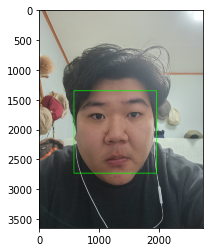

In [99]:
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 10, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [7]:
# landmark 모델 호출
model_path = 'models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [8]:
# 랜드마크 저장 list
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


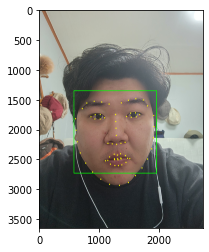

In [9]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point,10, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()

In [10]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):  # 얼굴 영역 및 랜드마크 탐색
    print(landmark[30])  # 코 끝 좌표 출력 (디버깅용)

    x = landmark[30][0]  # 코 끝의 x 좌표
    y = landmark[30][1]  # 코 끝의 y 좌표
    w = h = dlib_rect.width()

    print(f"(x, y) : ({x}, {y})")
    print(f"(w, h) : ({w}, {h})")

(1289, 2098)
(x, y) : (1289, 2098)
(w, h) : (1381, 1381)


In [11]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png' 
img_sticker = cv2.imread(sticker_path) # 알파채널 포함하여 로드
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정
print (img_sticker.shape)

(1381, 1381, 3)


In [12]:
refined_x = x - w // 2  # 중앙 정렬을 위해 왼쪽으로 절반 이동
refined_y = y - h // 2

print(f"(x, y) : ({refined_x}, {refined_y})")

(x, y) : (599, 1408)


In [13]:
if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]  # 왼쪽이 초과되면 스티커 잘라내기
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]  # 위쪽이 초과되면 스티커 잘라내기
    refined_y = 0

print(f"(Adjusted x, y) : ({refined_x}, {refined_y})")

(Adjusted x, y) : (599, 1408)


In [14]:
sticker_h, sticker_w, _ = img_sticker.shape
sticker_area = img_show[refined_y:refined_y + sticker_h, refined_x:refined_x + sticker_w]
mask = np.all(img_sticker == [255, 255, 255], axis=-1)
img_show[refined_y:refined_y + sticker_h, refined_x:refined_x + sticker_w] = \
    np.where(mask[:, :, None], sticker_area, img_sticker).astype(np.uint8)

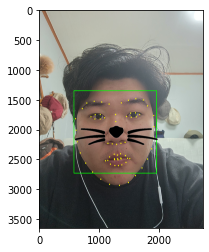

In [15]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

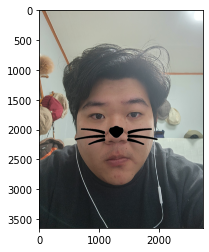

In [16]:
sticker_h, sticker_w, _ = img_sticker.shape
sticker_area = img_bgr[refined_y:refined_y + sticker_h, refined_x:refined_x + sticker_w]
mask = np.all(img_sticker == [255, 255, 255], axis=-1) 
img_bgr[refined_y:refined_y + sticker_h, refined_x:refined_x + sticker_w] = \
    np.where(mask[:, :, None], sticker_area, img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

In [17]:
# 테스트 1
# 온전치 못한 얼굴(?) : 얼굴 전체가 나오지 않고 일부만 나왔을 때

In [68]:
# 테스트용 사진 만들기
h, w, _ = img_bgr.shape
h, w

(3648, 2736)

In [101]:
img_test = img_bgr.copy()

img_top_rgb = img_test[:h//2, :]
img_bot_rgb = img_test[h//2:, :]

crop_h = int(h * 0.25)
img_left_rgb = img_test[crop_h:h-crop_h, :w//2]
img_right_rgb = img_test[crop_h:h-crop_h, w//2:]

In [102]:
output_img = [img_top_rgb, img_bot_rgb, img_left_rgb, img_right_rgb]

In [116]:
import math

def draw_faces_and_landmarks(image_list, dlib_rects, landmark_predictor):
    processed_images = []

    for img in image_list:
        img_copy = img.copy()  # 원본 이미지 복사

        for dlib_rect in dlib_rects:
            # 얼굴 박스 그리기 (초록색)
            l, t, r, b = dlib_rect.left(), dlib_rect.top(), dlib_rect.right(), dlib_rect.bottom()
            cv2.rectangle(img_copy, (l, t), (r, b), (0, 255, 0), 10, lineType=cv2.LINE_AA)

            # 랜드마크 검출
            points = landmark_predictor(img_copy, dlib_rect)
            list_points = [(int(p.x), int(p.y)) for p in points.parts()]

            # 랜드마크를 노란색 (0, 255, 255) 원으로 표시
            for point in list_points:
                cv2.circle(img_copy, point, 20, (0, 255, 255), -1)  # 크기 3, 노란색 원

        processed_images.append(img_copy)

    return processed_images


def show_images(image_list):
    num_images = len(image_list)

    if num_images == 0:
        print("이미지 리스트가 비어 있습니다.")
        return
    
    rows = math.ceil(num_images / 2)
    
    plt.figure(figsize=(10, rows * 3))
    
    for idx, img in enumerate(image_list):
        plt.subplot(rows, 2, idx + 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 

    plt.tight_layout()
    plt.show()


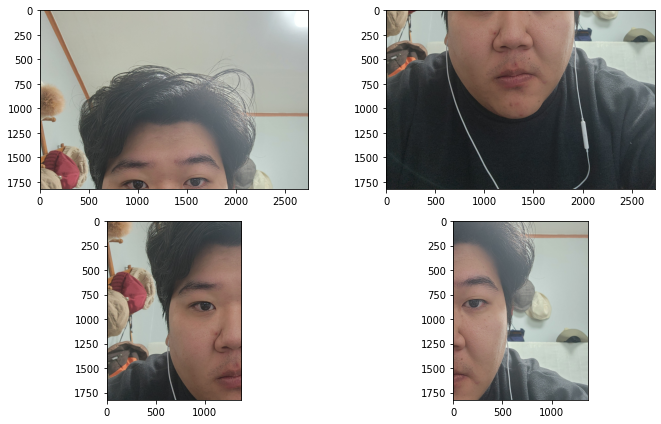

In [117]:
show_images(output_img)

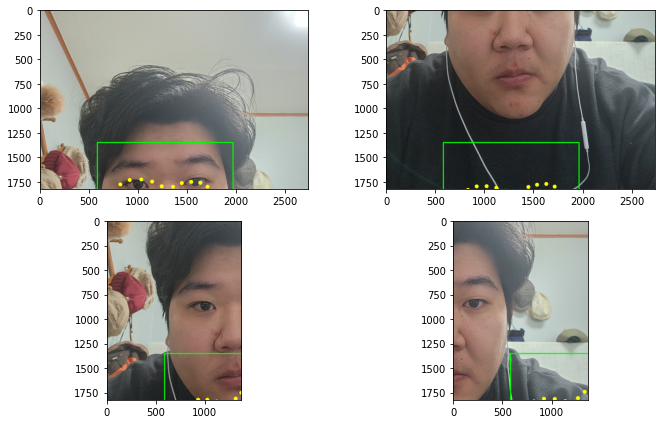

In [118]:
# 이미지 리스트
output_img = [img_top_rgb, img_bot_rgb, img_left_rgb, img_right_rgb]

# 얼굴 검출 및 랜드마크 적용
processed_images = draw_faces_and_landmarks(output_img, dlib_rects, landmark_predictor)

show_images(processed_images)

In [119]:
# 테스트 1 결과
# 얼굴 전체가 나오지 않고 일부만 나왔을 때, 얼굴자체를 인식하지 못함

In [120]:
# 테스트 2
# 회전된 사진 : 얼굴이 비스듬히 기울려져 있을때

In [121]:
def rotate_image(image, angle):
    (h, w) = image.shape[:2]  # 이미지 높이, 너비
    center = (w // 2, h // 2)  # 중심 좌표
    
    # 회전 행렬 생성 (OpenCV는 반시계 방향이 기본)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    
    # 회전된 이미지 생성
    rotated_img = cv2.warpAffine(image, M, (w, h), borderMode=cv2.BORDER_REPLICATE)
    
    return rotated_img

In [122]:
img_30 = rotate_image(img_test, 30)   # 30도
img_60 = rotate_image(img_test, 60)   # 60도
img_90 = rotate_image(img_test, 90)   # 90도
img_180 = rotate_image(img_test, 180) # 180도

rotated_images = [img_30, img_60, img_90, img_180]

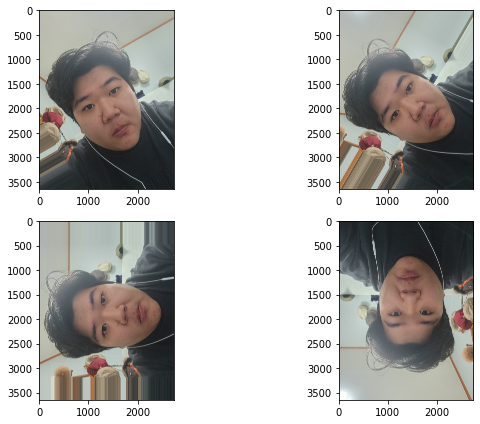

In [123]:
show_images(rotated_images)

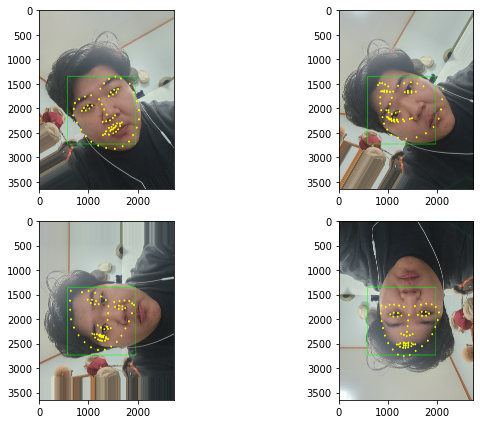

In [124]:
# 얼굴 검출 및 랜드마크 적용
processed_images = draw_faces_and_landmarks(rotated_images, dlib_rects, landmark_predictor)

show_images(processed_images)

In [125]:
# 테스트 2 결과
# 얼굴 전체가 나와서 라운딩 박스는 탐지가 잘됨
# 그러나, 눈 코 입 위치값이 바꿔서 그런지 랜드마크 키포인트는 정상적을 찾지못함 

In [126]:
# 테스트 2-1
# 사진 회전 입계값 찾기
# 5도 간격으로 테스트 후 어느 지점부터 정상작동 안되는지 알아보기

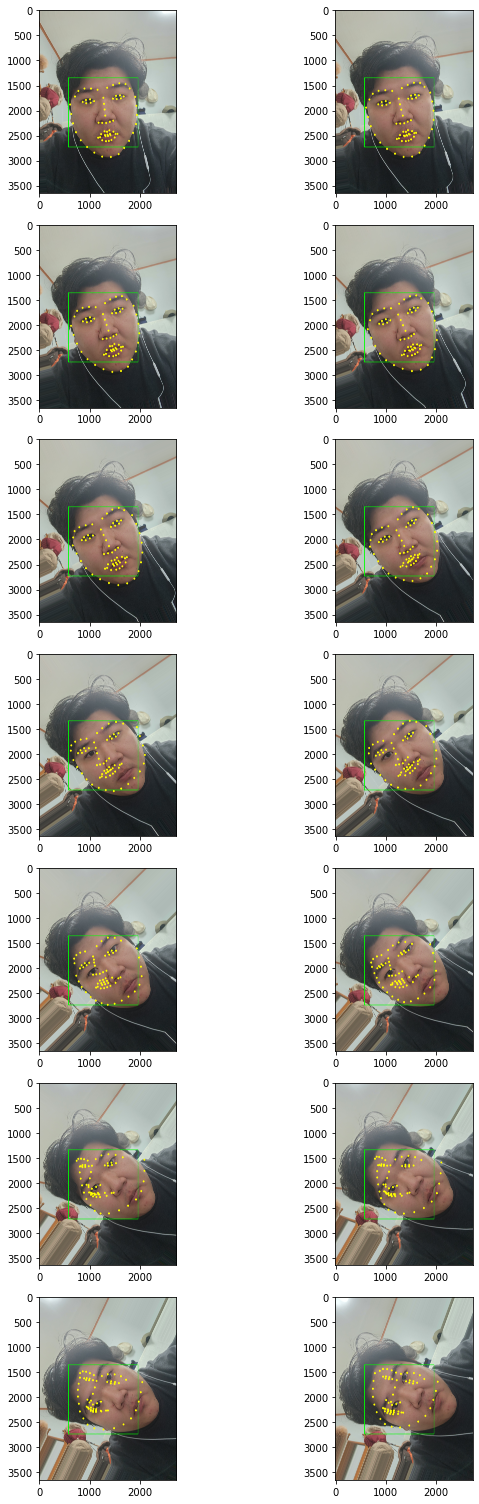

In [128]:
rotated_images = []
for angle in range(5, 75, 5):
    rotated_images.append(rotate_image(img_test, angle))

processed_images = draw_faces_and_landmarks(rotated_images, dlib_rects, landmark_predictor)
show_images(processed_images)

In [129]:
# 테스트 2-1 결과
# 25도까진 눈코입을 비교적 정확하게 탐지가능
# 30도부턴 위치를 정확히 탐지하지 못한다.

In [130]:
# 테스트 3
# 얼굴 크기별 인식: 얼굴위주 사진과 몸 전체 사진 비교

In [135]:
face_1 = cv2.imread('images/face_1.jpg') 
face_2 = cv2.imread('images/face_2.jpg') 
face_3 = cv2.imread('images/face_3.jpg') 
face_4 = cv2.imread('images/face_4.jpg') 

model_1 = cv2.imread('images/model_1.jpg')  
model_2 = cv2.imread('images/model_2.jpg')  
model_3 = cv2.imread('images/model_3.jpg')  
model_4 = cv2.imread('images/model_4.jpg')  

face_list=[face_1, face_2, face_3, face_4]
model_list = [model_1, model_2, model_3, model_4]

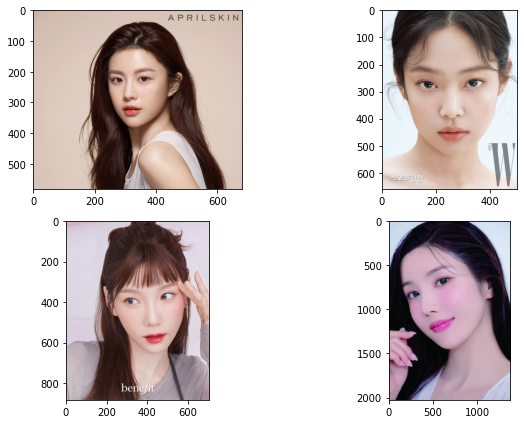

In [136]:
show_images(face_list)

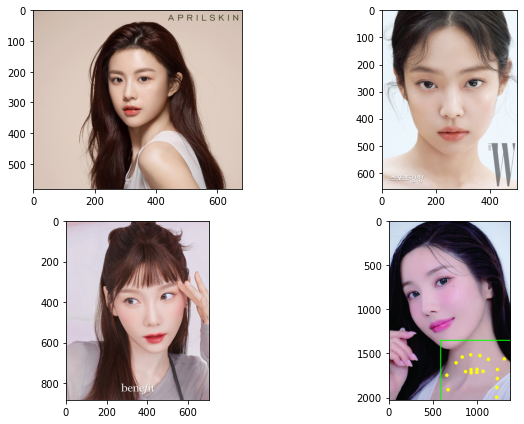

In [138]:
processed_images = draw_faces_and_landmarks(face_list, dlib_rects, landmark_predictor)
show_images(processed_images)

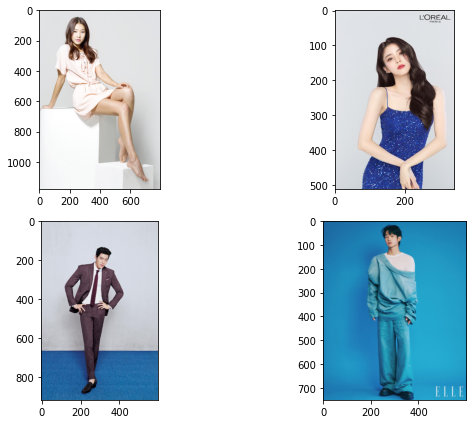

In [137]:
show_images(model_list)

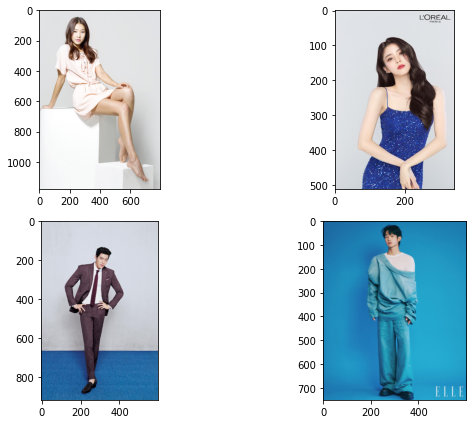

In [139]:
processed_images = draw_faces_and_landmarks(model_list, dlib_rects, landmark_predictor)
show_images(processed_images)

In [143]:
# 둘다 정상작동 되지않음
# 이유는 크게 2가지인듯
# 1. 이미지 해상도 문제
# 이미지가 너무 크거나 작으면 감지율이 떨어질수있다
# 2. 조명 문제
# 화보사진은 일반적인 셀카와 다르게 보정과 조명이 적용되서 감지율이 낮아진다.
# 즉, 피부결이나 눈코입 등이 보정되거나 조명을 강하게 주면서 균일한 밝기를 가지면
# 경계를 인식하지 못해 특징 추출이 어려워질수있다.